In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from time import time

import importlib
import SpyderZ
importlib.reload(SpyderZ)
SpyderZ = SpyderZ.SpyderZ

In [2]:
### Hyper Parameters | Data Choices
bin_size = 0.1
n_features = 5
C = 32768
# gamma is auto-decided

train_size = 4000 # adjust so that all bins are represented at least once (?)
test_size = 282401

### Data Handling

training_set = np.array(list(csv.reader(open('training_set.csv', 'r'))), dtype=np.float32)
evaluation_set = np.array(list(csv.reader(open('evaluation_set.csv', 'r'))), dtype=np.float32)

x_train = training_set[:train_size, :-1]
z_train = training_set[:train_size, -1]

x_test = evaluation_set[:test_size, :-1]
z_test = evaluation_set[:test_size,-1]

In [3]:
start_time = time()

model = SpyderZ(n_features=5, bin_size=0.1, max_z=4, C=C, run_parallel=True)
model.train(x_train, z_train)

print(f'SVMs trained in {round(time()-start_time, 3)}s')

SVMs trained in 7.723s


In [4]:
start_time = time()

z_pred, ePDFs = model.predict(x_test)

print(f'SVM predicted z and ePDFs in {round(time()-start_time,3)}s')

SVM predicted z and ePDFs in 872.89s


In [5]:
metrics = model.get_metrics(z_test, z_pred)

RMSE: 0.22238
R-RMSE: 0.04241

Outlier Percent:, 9.534
Catastrophic Outlier Percent: 4.949

Bin Match Accuracy: 59.452


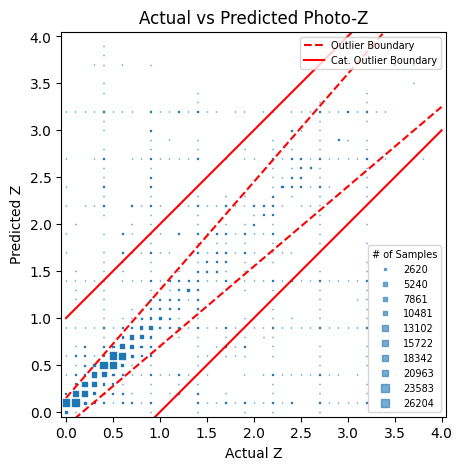

In [6]:
model.plot_actual_vs_predicted_z(z_test, z_pred, save_plot_as='Actual v Predicted PhotoZ.png')

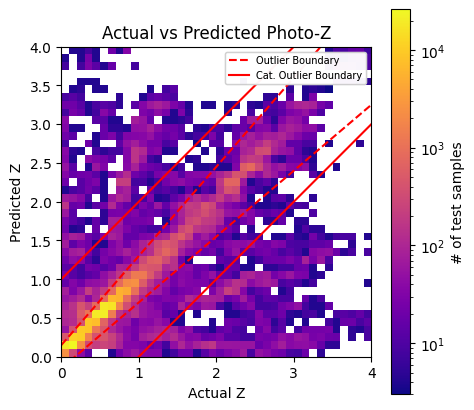

In [7]:
model.plot_actual_vs_predicted_z(z_test, z_pred, save_plot_as='Actual v Predicted PhotoZ Color.png', mode='color')

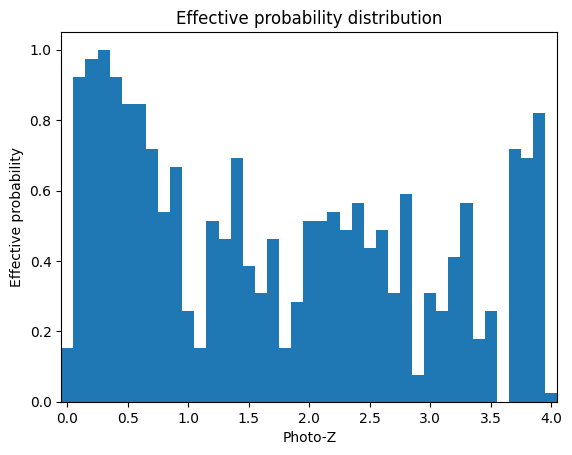

In [8]:
model.plot_ePDF(ePDFs[0])